In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib as plt

In [24]:
adani_df = yf.download('ITC.ns', 
                      start='2020-11-18', 
                      end='2022-1-20', 
                      progress=False)

In [29]:
adani_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-13,223.899994,225.800003,222.750000,223.949997,223.949997,11501088
2022-01-14,223.949997,224.800003,222.300003,222.600006,222.600006,10569725
2022-01-17,222.600006,225.600006,221.350006,224.600006,224.600006,12318313
2022-01-18,224.600006,227.300003,220.300003,220.750000,220.750000,14394097
2022-01-19,220.750000,222.399994,218.699997,220.350006,220.350006,11473796


In [30]:
adani_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,291.000000,291.000000,291.000000,291.000000,291.000000,2.910000e+02
mean,215.453093,217.688831,212.980928,215.091752,211.364746,2.796628e+07
std,12.614662,13.046961,11.929070,12.377110,14.448457,2.060150e+07
min,182.800003,188.449997,182.699997,184.050003,174.923737,7.024796e+06
25%,207.000000,208.650002,205.000000,206.550003,202.492867,1.531176e+07
50%,212.449997,214.250000,210.149994,211.750000,207.380371,2.215233e+07
75%,221.949997,224.750000,219.525002,221.774994,220.300003,3.314838e+07
max,261.399994,265.299988,257.350006,262.549988,262.549988,1.492389e+08


## Slicing data frame
selection by label
    .loc
    --> fb.loc['2015-01-02', 'Close']
selection by position
    .iloc
    -->fb.iloc[1,3]

<AxesSubplot:xlabel='Date'>

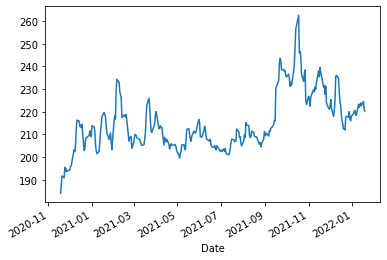

In [31]:
## for plotting stock price
adani_df.loc[:,'Close'].plot()

<AxesSubplot:xlabel='Date'>

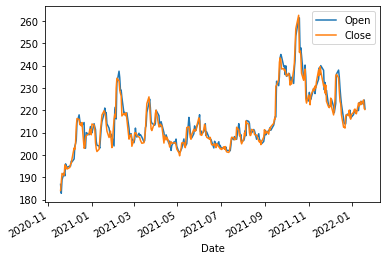

In [32]:
###for plotting open and close prices both
adani_df.loc[:,['Open', 'Close']].plot()

<AxesSubplot:xlabel='Date'>

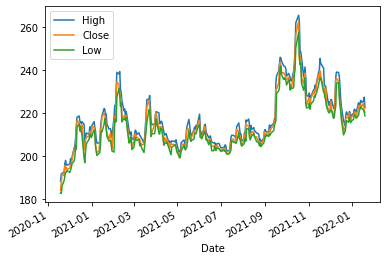

In [33]:
adani_df.loc[:,['High', 'Close','Low']].plot()

In [34]:
#calculating price difference of close of two days
#first will create a column that will give close price of d+1 days
adani_df['Price+1'] = adani_df['Close'].shift(-1)
#now we will make another column of price difference
adani_df['PriceDiff'] = adani_df['Price+1']-adani_df['Close']
adani_df.head()

,Open,High,Low,Close,Adj Close,Volume,Price+1,PriceDiff
Date,,,,,,,,
2020-11-18,186.800003,188.449997,182.750000,184.050003,174.923737,26595992,187.899994,3.849991
2020-11-19,182.800003,191.800003,182.699997,187.899994,178.582825,48984610,191.699997,3.800003
2020-11-20,188.800003,192.000000,186.050003,191.699997,182.194397,45307312,190.850006,-0.849991
2020-11-23,192.000000,192.500000,188.649994,190.850006,181.386551,23180456,195.550003,4.699997
2020-11-24,190.600006,196.449997,190.600006,195.550003,185.853500,45411815,193.850006,-1.699997


In [35]:
#for daily return: pricedifference divide by close
adani_df['DailyReturn']=adani_df['PriceDiff']/adani_df['Close']
adani_df['DailyReturn'].head()

Date
2020-11-18    0.020918
2020-11-19    0.020224
2020-11-20   -0.004434
2020-11-23    0.024627
2020-11-24   -0.008693
Name: DailyReturn, dtype: float64

In [36]:
#if price diff is positive, direction is up and it is bull
#if opposite, its bear
adani_df['Direction'] = [1 if adani_df.loc[ei,'PriceDiff']>0 else -1 if adani_df.loc[ei,'PriceDiff']<0 else 0  
                        for ei in adani_df.index]

adani_df['Direction'].tail()

Date
2022-01-13   -1
2022-01-14    1
2022-01-17   -1
2022-01-18   -1
2022-01-19    0
Name: Direction, dtype: int64

## Moving averages

<AxesSubplot:xlabel='Date'>

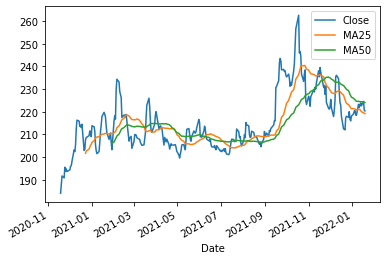

In [60]:
#Calculating moving average using rolling()
adani_df['MA25'] = adani_df['Close'].rolling(25).mean()
adani_df['MA50'] = adani_df['Close'].rolling(50).mean()
adani_df.loc[:,['Close','MA25','MA50']].plot()
#smaller the days of average, faster it will signal
#if MA25 is below MA 50, some traders believe stock will move down and vice versa

In [61]:
#Trading strategy
adani_df['Shares'] = [1 if adani_df.loc[ei,'MA25']>adani_df.loc[ei,'MA50'] else 0
                     for ei in adani_df.index]

In [62]:
#for daily profit
adani_df['Close+1'] = adani_df['Close'].shift(-1)
adani_df['Profit'] = [adani_df.loc[ei, 'Close+1']-adani_df.loc[ei, 'Close'] 
                     if adani_df.loc[ei, 'Shares']==1
                     else 0 for ei in adani_df.index]

<AxesSubplot:xlabel='Date'>

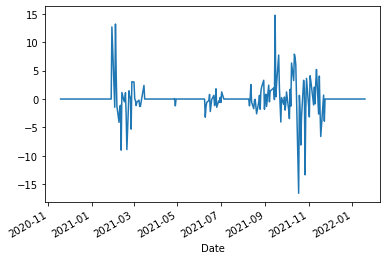

In [63]:
adani_df['Profit'].plot()


In [64]:
#cumulative wealth
adani_df['wealth'] = adani_df['Profit'].cumsum()
adani_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Price+1,PriceDiff,DailyReturn,Direction,MA25,MA50,Shares,Close+1,Profit,wealth
Date,,,,,,,,,,,,,,,,
2022-01-13,223.899994,225.800003,222.750000,223.949997,223.949997,11501088,222.600006,-1.349991,-0.006028,-1,220.550001,224.433,0,222.600006,0.0,12.5
2022-01-14,223.949997,224.800003,222.300003,222.600006,222.600006,10569725,224.600006,2.000000,0.008985,1,220.010001,224.436,0,224.600006,0.0,12.5
2022-01-17,222.600006,225.600006,221.350006,224.600006,224.600006,12318313,220.750000,-3.850006,-0.017142,-1,219.610001,224.397,0,220.750000,0.0,12.5
2022-01-18,224.600006,227.300003,220.300003,220.750000,220.750000,14394097,220.350006,-0.399994,-0.001812,-1,219.296000,224.216,0,220.350006,0.0,12.5
2022-01-19,220.750000,222.399994,218.699997,220.350006,220.350006,11473796,NaN,NaN,NaN,0,219.148000,224.048,0,NaN,0.0,12.5


Therefore this strategy made about 32 rs

In [65]:
print("total money you earn is ", adani_df.loc[adani_df.index[-2],'wealth'])
print("total money you spent is ", adani_df.loc[adani_df.index[0],'Close'])

total money you earn is  12.5
total money you spent is  184.0500030517578


In [66]:
#Profit percentage?
print("Returns in percentage = ", adani_df.loc[adani_df.index[-2],'wealth']/adani_df.loc[adani_df.index[0],'Close']*100," %")

Returns in percentage =  6.79163259589015  %


In [52]:
adani_df.columns
#gives information of all the columns


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Price+1',
       'PriceDiff', 'DailyReturn', 'Direction', 'MA25', 'MA50', 'Shares',
       'Close+1', 'Profit', 'wealth'],
      dtype='object')

## Random variable
# Discrete random variables vs Continuous Random variable
#

In [21]:
from scipy.stats import norm